In [60]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#reading files
calls=pd.read_csv('calls.csv')
customers=pd.read_csv('customers.csv')
reasons= pd.read_csv('reason.csv')
sentiments= pd.read_csv('sentiment.csv')

### ***Data Preprocessing***

In [62]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [63]:
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [64]:
reasons.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [65]:
sentiments.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [66]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [67]:
# correcting Data Types
calls['call_start_datetime']=pd.to_datetime(calls['call_start_datetime'])
calls['call_end_datetime']=pd.to_datetime(calls['call_end_datetime'])
calls['agent_assigned_datetime']=pd.to_datetime(calls['agent_assigned_datetime'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 3.8+ MB


In [68]:
#Merging Data
merged_df = calls.merge(reasons, on='call_id', how='left') \
                      .merge(customers, on='customer_id', how='left') \
                      .merge(sentiments, on='call_id', how='left')
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,NaN,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,NaN,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0,721730,neutral,polite,-0.05,0.35


In [69]:
#Looking at Basic Info about Merged Data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id_x               71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
 7   primary_call_reason      66653 non-null  object        
 8   customer_name            71810 non-null  object        
 9   elite_level_code         46043 non-null  float64       
 10  agent_id_y               71810 non-null  int64         
 11  agent_tone               71593 non-null  object        
 12  customer_tone            71810 n

In [70]:
# Looking at basic stats of merged data
merged_df.describe()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,elite_level_code,agent_id_y,average_sentiment,silence_percent_average
count,7.181000e+04,7.181000e+04,71810.000000,71810,71810,71810,46043.000000,71810.000000,71701.000000,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039,2024-08-16 10:42:34.023116544,2024-08-16 10:49:51.090655744,2024-08-16 11:01:28.139256320,1.370871,564768.278039,-0.033519,0.285515
min,1.316420e+05,1.197800e+04,102574.000000,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:17:00,0.000000,102574.000000,-1.380000,0.000000
25%,2.480013e+09,2.514618e+09,347606.000000,2024-08-09 10:58:30,2024-08-09 11:07:15,2024-08-09 11:19:30,0.000000,347606.000000,-0.110000,0.130000
50%,4.989448e+09,4.999664e+09,591778.000000,2024-08-17 09:02:00,2024-08-17 09:08:00,2024-08-17 09:20:00,1.000000,591778.000000,-0.020000,0.260000
75%,7.493629e+09,7.509126e+09,786323.000000,2024-08-24 14:17:00,2024-08-24 14:24:45,2024-08-24 14:36:00,2.000000,786323.000000,0.050000,0.410000
max,9.999806e+09,9.999935e+09,993862.000000,2024-08-31 23:55:00,2024-08-31 23:59:00,2024-09-01 01:33:00,5.000000,993862.000000,2.670000,0.980000
std,2.889673e+09,2.884255e+09,257532.362167,NaN,NaN,NaN,1.322297,257532.362167,0.143715,0.192031


In [71]:
#Remove duplicate rows after merging
merged_df=merged_df.drop('agent_id_y',axis=1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id_x               71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
 7   primary_call_reason      66653 non-null  object        
 8   customer_name            71810 non-null  object        
 9   elite_level_code         46043 non-null  float64       
 10  agent_tone               71593 non-null  object        
 11  customer_tone            71810 non-null  object        
 12  average_sentiment        71701 n

### **Dealing With Nulls**

In [72]:
#Checking for nulls
merged_df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id_x,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
primary_call_reason,5157
customer_name,0
elite_level_code,25767


In [73]:
# Filling null elite_code_values with 0
merged_df['elite_level_code']=merged_df['elite_level_code'].fillna(0)
# Data would have been available if it was >0
merged_df.dropna(inplace=True)
#Dropping agent_tone and primary_call_reason values as they are less than 10% of the total data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66455 entries, 0 to 71809
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  66455 non-null  int64         
 1   customer_id              66455 non-null  int64         
 2   agent_id_x               66455 non-null  int64         
 3   call_start_datetime      66455 non-null  datetime64[ns]
 4   agent_assigned_datetime  66455 non-null  datetime64[ns]
 5   call_end_datetime        66455 non-null  datetime64[ns]
 6   call_transcript          66455 non-null  object        
 7   primary_call_reason      66455 non-null  object        
 8   customer_name            66455 non-null  object        
 9   elite_level_code         66455 non-null  float64       
 10  agent_tone               66455 non-null  object        
 11  customer_tone            66455 non-null  object        
 12  average_sentiment        66455 non-nu

In [74]:
merged_df.shape

(66455, 14)

In [75]:
# Checking for any duplicates or mistakes in primary_call_reasons
merged_df.primary_call_reason.unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight',
       'Check In', 'Other  Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'IRROPS  ', 'Digital   Support',
       'Seating  ', 'Disability', 'Unaccompanied Minor', ' Baggage',
       'Traveler  Updates', 'Communications  ', 'ETC', 'Upgrade  ',
       'Unaccompanied Minor  ', 'Voluntary Change', 'Voluntary Change  ',
       'Checkout  ', 'Mileage Plus', 'Mileage Plus  ', 'Booking  ',
       'Baggage  ', 'Post-Flight', 'Post-Flight  ', 'Schedule Change  ',
       'Baggage', 'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Support', 'Mileage  P

In [76]:
 # Normalize spacing in the primary_call_reason column

merged_df['primary_call_reason'] = (
        merged_df['primary_call_reason']
        .str.strip()  # Remove leading/trailing whitespace
        .str.replace(r'\s+', ' ', regex=True))
merged_df['primary_call_reason'] = (
        merged_df['primary_call_reason'].str.replace('-', ' ', regex=True)) #replacing '-' with ' '
merged_df['primary_call_reason'] = (
        merged_df['primary_call_reason'] .str.replace('&', 'and', regex=True)) #replacing '&' with 'and'

In [77]:
# duplicates and flase values removed
merged_df.primary_call_reason.unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products and Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

### ***Feature Extraction***

In [78]:
#Computing Handling time,Speed to answer time and total time
merged_df['Handling_time']=(merged_df['call_end_datetime']-merged_df['agent_assigned_datetime']).dt.total_seconds()
merged_df['Speed_to_answer_time']=(merged_df['agent_assigned_datetime']-merged_df['call_start_datetime']).dt.total_seconds()
merged_df['total_time'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,Handling_time,Speed_to_answer_time,total_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0,neutral,angry,-0.04,0.39,1860.0,420.0,2280.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,0.0,calm,neutral,0.02,0.35,720.0,180.0,900.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,0.0,neutral,polite,-0.13,0.32,1140.0,480.0,1620.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0,neutral,frustrated,-0.20,0.20,420.0,300.0,720.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35,540.0,600.0,1140.0


In [79]:
# Extracting DOW and hour of day from merged_df
merged_df['day']=merged_df['call_start_datetime'].dt.dayofweek #DOW
merged_df['hour']=merged_df['call_start_datetime'].dt.hour #HOD
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,Handling_time,Speed_to_answer_time,total_time,day,hour
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0,neutral,angry,-0.04,0.39,1860.0,420.0,2280.0,2,23
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,0.0,calm,neutral,0.02,0.35,720.0,180.0,900.0,3,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,0.0,neutral,polite,-0.13,0.32,1140.0,480.0,1620.0,2,23
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0,neutral,frustrated,-0.20,0.20,420.0,300.0,720.0,3,0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35,540.0,600.0,1140.0,3,0


In [80]:
#Writing a function to categorize the mode of complaint resolvment.

def modes(x):
  if x==0:
    return 'IVR'
  else:
    return 'Agent'

merged_df['mode']=merged_df['Handling_time'].apply(modes) # Categorizes any complaint with Handling time =0 as Ivr and others as Agent
merged_df.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,Handling_time,Speed_to_answer_time,total_time,day,hour,mode
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0,neutral,angry,-0.04,0.39,1860.0,420.0,2280.0,2,23,Agent
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,0.0,calm,neutral,0.02,0.35,720.0,180.0,900.0,3,0,Agent
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,0.0,neutral,polite,-0.13,0.32,1140.0,480.0,1620.0,2,23,Agent
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0,neutral,frustrated,-0.20,0.20,420.0,300.0,720.0,3,0,Agent
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35,540.0,600.0,1140.0,3,0,Agent


### ***Insight Generation***

In [81]:
#Calculating the %age difference between the most and least occuring primary call reasons
frequency =merged_df['primary_call_reason'].value_counts()
most_frequent_reason = frequency.idxmax()
least_frequent_reason = frequency.idxmin()

# Calculate AHT for these reasons
aht_most = merged_df[merged_df['primary_call_reason'] == most_frequent_reason]['Handling_time'].mean()
aht_least = merged_df[merged_df['primary_call_reason'] == least_frequent_reason]['Handling_time'].mean()

# Percentage difference
percentage_difference = ((aht_most - aht_least) / aht_least) * 100
print(f"Percentage difference in AHT: {percentage_difference}%")

Percentage difference in AHT: 51.50026806058167%


In [82]:
# looking at the mean Handling, speed to answer and total time
mean_sta=merged_df['Speed_to_answer_time'].mean()/60      #converting into minutes
mean_ht=merged_df['Handling_time'].mean()/60          #converting into minutes
mean_tt=merged_df['total_time'].mean()/60          #converting into minutes
print(f"Average handling time is {mean_ht} minutes")
print(f"Average speed to asnwer time is {mean_sta} minutes")
print(f"Average total time is {mean_tt} minutes")

Average handling time is 11.6385975472124 minutes
Average speed to asnwer time is 7.282446768489956 minutes
Average total time is 18.921044315702357 minutes


In [83]:
# looking at complaints that didn't require the intervention of an agent
merged_df_IVR= merged_df[merged_df['Handling_time']==0]
merged_df_IVR.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,Handling_time,Speed_to_answer_time,total_time,day,hour,mode
77,3265727999,5448977201,519057,2024-08-01 03:55:00,2024-08-01 04:01:00,2024-08-01 04:01:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Chelsea Shaw,1.0,neutral,angry,0.00,0.12,0.0,360.0,360.0,3,3,IVR
188,8487711690,9298308725,915618,2024-08-01 08:31:00,2024-08-01 08:41:00,2024-08-01 08:41:00,\n\nAgent: Thank you for calling United Airlin...,Seating,Bryan Goodwin,2.0,neutral,polite,0.00,0.35,0.0,600.0,600.0,3,8,IVR
201,6761810180,2686604075,153460,2024-08-01 08:37:00,2024-08-01 08:47:00,2024-08-01 08:47:00,\n\nAgent: Thank you for calling United Airlin...,Post Flight,Ashley Garcia,1.0,neutral,frustrated,0.00,0.00,0.0,600.0,600.0,3,8,IVR
274,8994453170,5581388869,524049,2024-08-01 09:35:00,2024-08-01 09:42:00,2024-08-01 09:42:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Change,Taylor White,0.0,neutral,angry,-0.20,0.39,0.0,420.0,420.0,3,9,IVR
330,3287832914,9279236023,619806,2024-08-01 10:01:00,2024-08-01 10:11:00,2024-08-01 10:11:00,\n\nAgent: Thank you for calling United Airlin...,Baggage,Nicole Powell,3.0,calm,angry,0.18,0.11,0.0,600.0,600.0,3,10,IVR


In [84]:
# Looking at cases that required agent intervention
merged_df_Operator= merged_df[~(merged_df['Handling_time']==0)]
merged_df_Operator.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,Handling_time,Speed_to_answer_time,total_time,day,hour,mode
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0,neutral,angry,-0.04,0.39,1860.0,420.0,2280.0,2,23,Agent
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,0.0,calm,neutral,0.02,0.35,720.0,180.0,900.0,3,0,Agent
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,0.0,neutral,polite,-0.13,0.32,1140.0,480.0,1620.0,2,23,Agent
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0,neutral,frustrated,-0.20,0.20,420.0,300.0,720.0,3,0,Agent
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35,540.0,600.0,1140.0,3,0,Agent


In [85]:
merged_df_IVR.call_id.count()

1065

In [86]:
merged_df_Operator.call_id.count()

65390

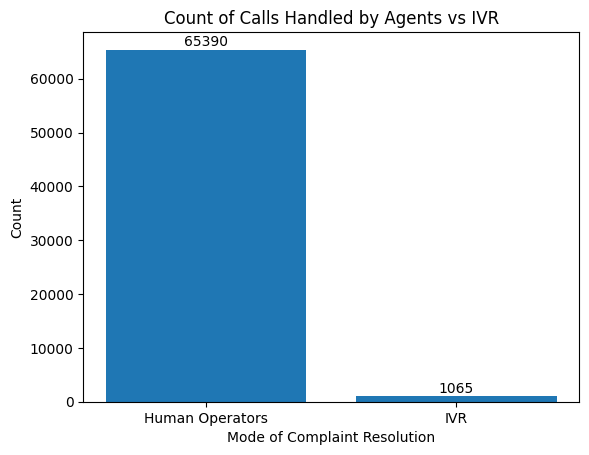

In [87]:
# Bar graph visualization to show the disproportionate work distribution between IVR systems and agents.
# Data for the bar graph
data = {'Human Operators': merged_df_Operator.call_id.count(), 'IVR': merged_df_IVR.call_id.count()}
labels = list(data.keys())
values = list(data.values())

# Creating the bar graph
plt.bar(labels, values)

# Add labels and title

plt.ylabel('Count')
plt.xlabel('Mode of Complaint Resolution')
plt.title('Count of Calls Handled by Agents vs IVR')

# Annotate each bar with its count value
for i, value in enumerate(values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')  # Adjust 'value + 100' for spacing

# Display the graph
plt.show()



In [88]:
# Average Time division and count for primary call reasons
td_by_reason=merged_df.groupby('primary_call_reason')[['Handling_time','Speed_to_answer_time','total_time','call_id']] \
.agg({'Handling_time':'mean','Speed_to_answer_time':'mean','total_time':'mean','call_id':'count'}).reset_index()
td_by_reason['Handling_time']=td_by_reason['Handling_time']/60
td_by_reason['Speed_to_answer_time']=td_by_reason['Speed_to_answer_time']/60
td_by_reason['total_time']=td_by_reason['total_time']/60

td_by_reason.columns=['td_by_reason','AHT','ASTA','ATA','count']
td_by_reason.sort_values('AHT', ascending=False)


,td_by_reason,AHT,ASTA,ATA,count
3,Checkout,16.994155,12.079171,29.073326,1882
9,Mileage Plus,16.618297,6.016275,22.634573,5837
7,ETC,16.077895,9.067368,25.145263,950
11,Post Flight,15.594570,9.490601,25.085171,4309
4,Communications,13.788321,3.999739,17.788060,3836
8,IRROPS,13.110600,6.002337,19.112937,13264
12,Products and Services,12.458622,5.038820,17.497442,3323
18,Voluntary Cancel,12.049906,8.990019,21.039925,1603
19,Voluntary Change,10.655768,9.009051,19.664819,10827
17,Upgrade,10.551573,4.974031,15.525604,2734


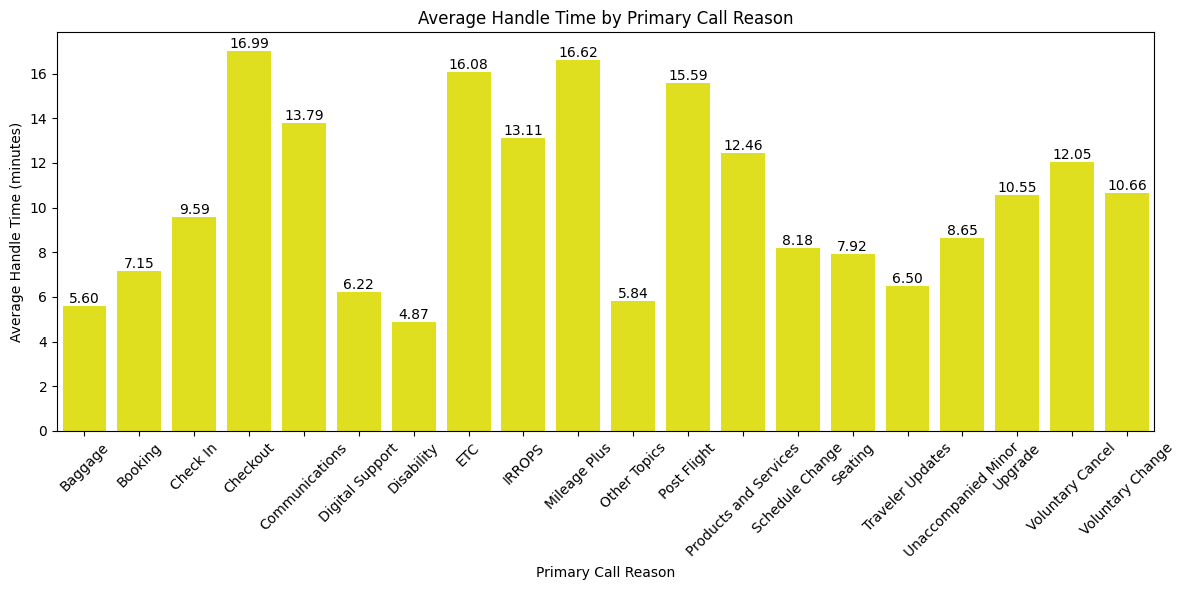

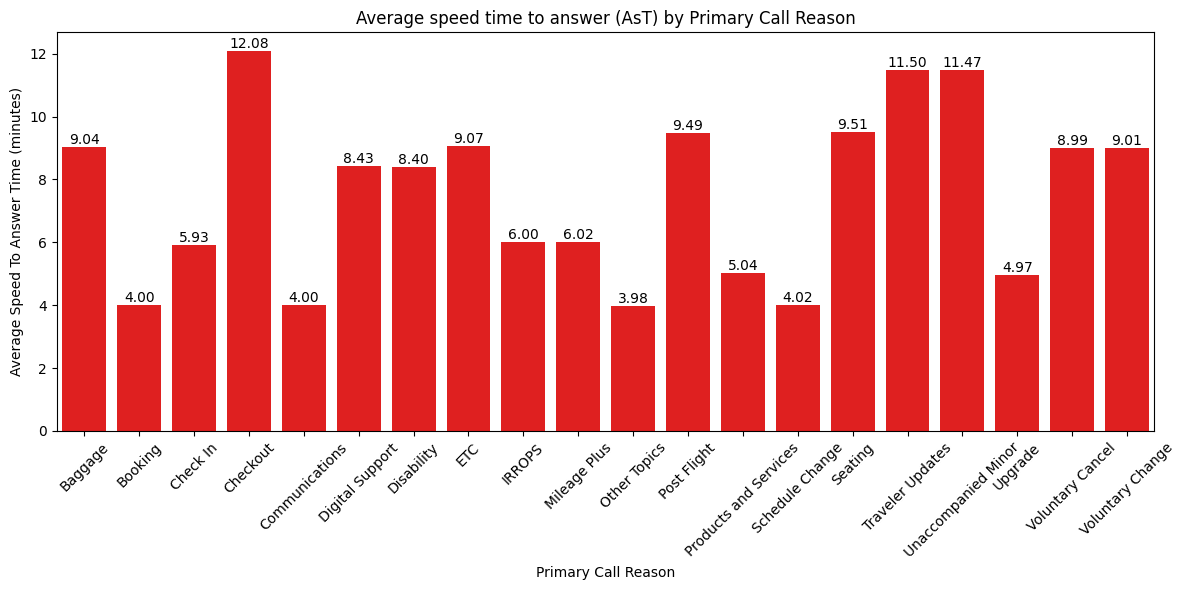

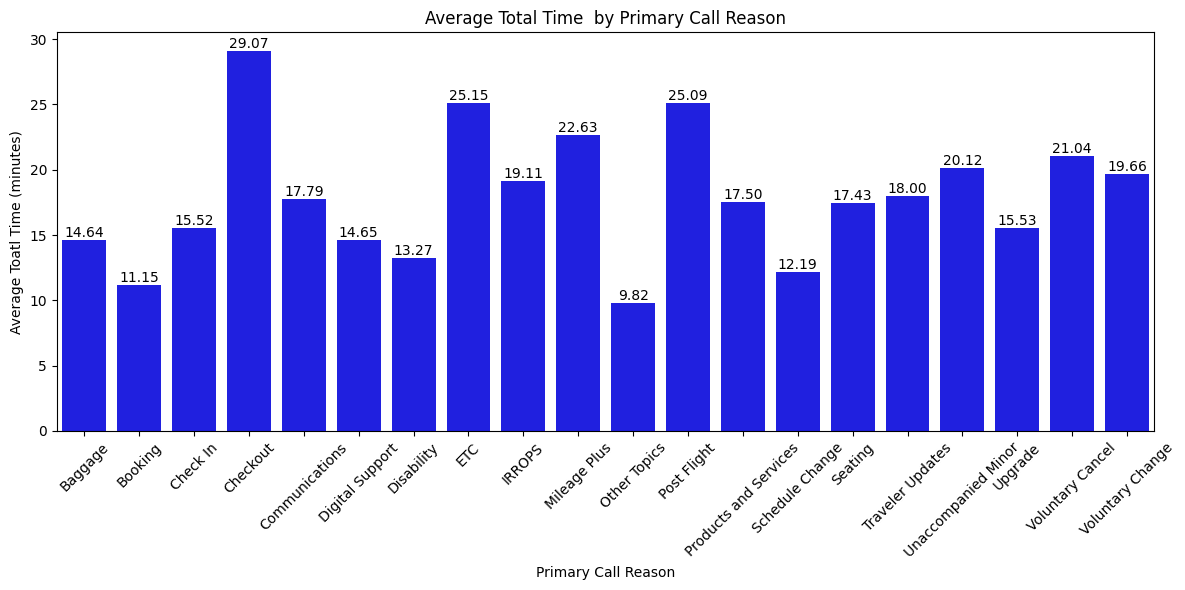

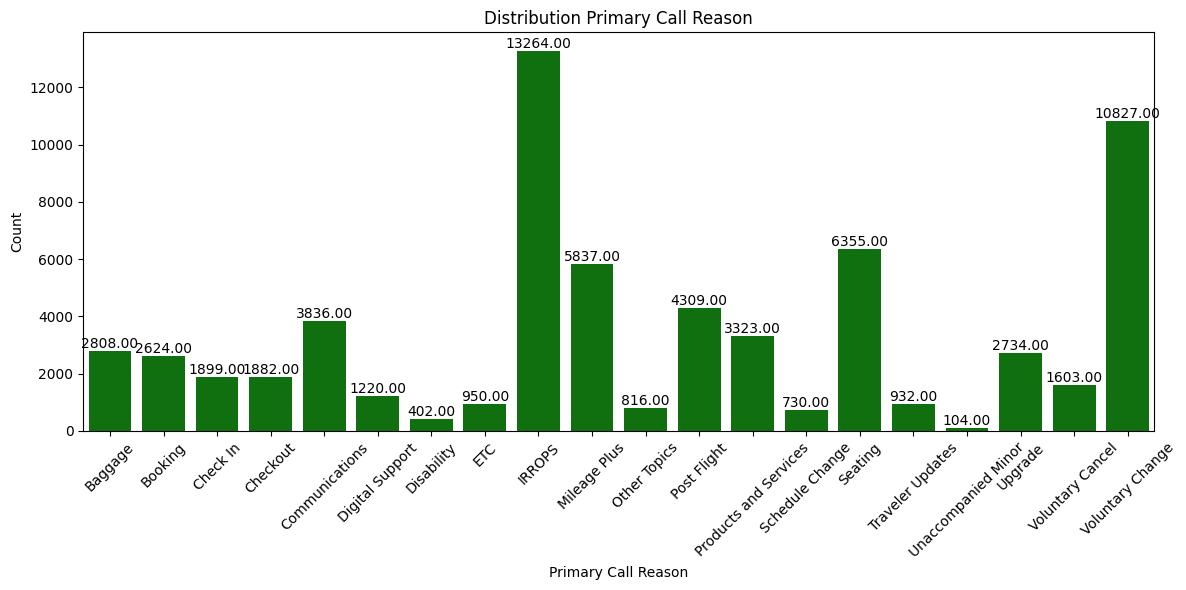

In [89]:
# Visualizing the 4 metrics w.r.t. primary call reasons all together

plt.figure(figsize=(12,6))
a= sns.barplot(x='td_by_reason',y='AHT', data=td_by_reason, color='Yellow')
plt.title('Average Handle Time by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(a.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
b= sns.barplot(x='td_by_reason',y='ASTA', data=td_by_reason, color='Red')
plt.title('Average speed time to answer (AsT) by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Speed To Answer Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(b.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
c= sns.barplot(x='td_by_reason',y='ATA', data=td_by_reason, color='Blue')
plt.title('Average Total Time  by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Toatl Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(c.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
d= sns.barplot(x='td_by_reason',y='count', data=td_by_reason,color='Green')
plt.title('Distribution Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
for index, bar in enumerate(d.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

In [90]:
# Average time division and count for agent tone

td_by_agent_tone=merged_df.groupby('agent_tone')[['Handling_time','Speed_to_answer_time','total_time','call_id']]\
.agg({'Handling_time':'mean','Speed_to_answer_time':'mean','total_time':'mean','call_id':'count'}).reset_index()
td_by_agent_tone['Handling_time']=td_by_agent_tone['Handling_time']/60
td_by_agent_tone['Speed_to_answer_time']=td_by_agent_tone['Speed_to_answer_time']/60
td_by_agent_tone['total_time']=td_by_agent_tone['total_time']/60
td_by_agent_tone.columns=['agent_tone','AHT','ASTA','ATA','count']
td_by_agent_tone.sort_values('AHT', ascending=False)


,agent_tone,AHT,ASTA,ATA,count
3,neutral,12.497732,7.237251,19.734983,39688
1,calm,10.455249,7.395595,17.850843,22882
2,frustrated,10.332170,7.061955,17.394124,3438
0,angry,6.483607,7.087432,13.571038,366
4,polite,3.716049,7.703704,11.419753,81


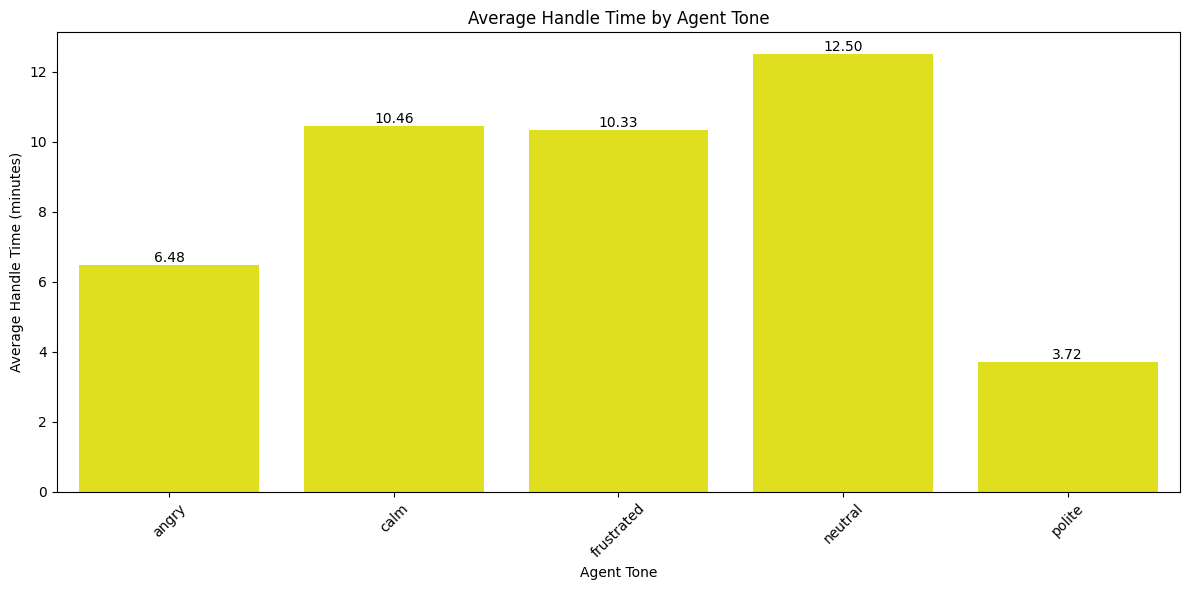

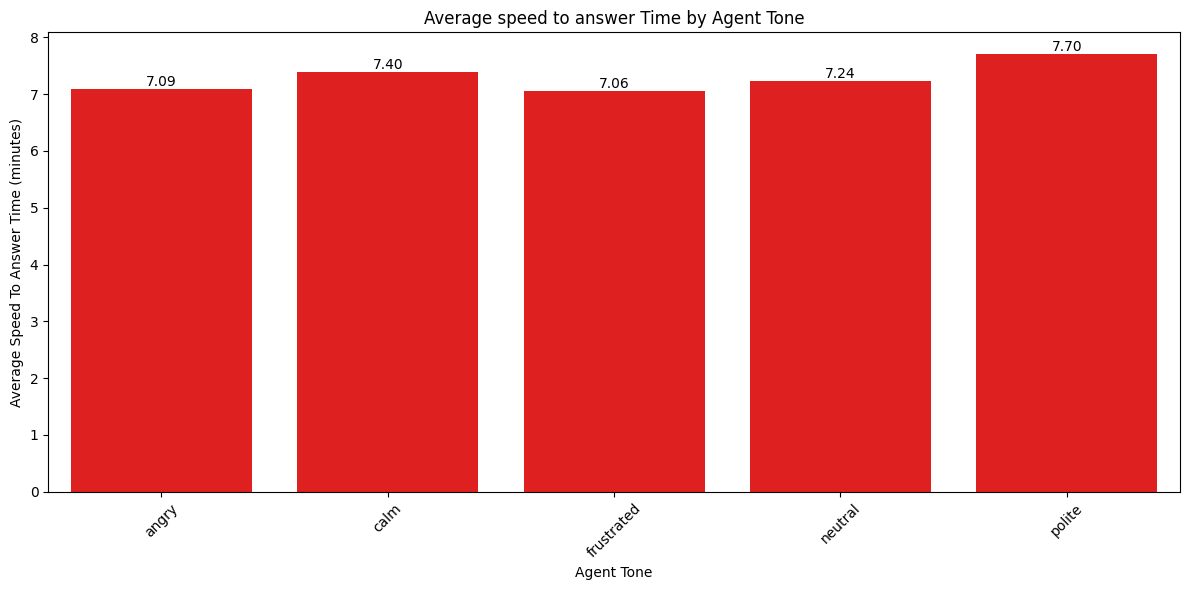

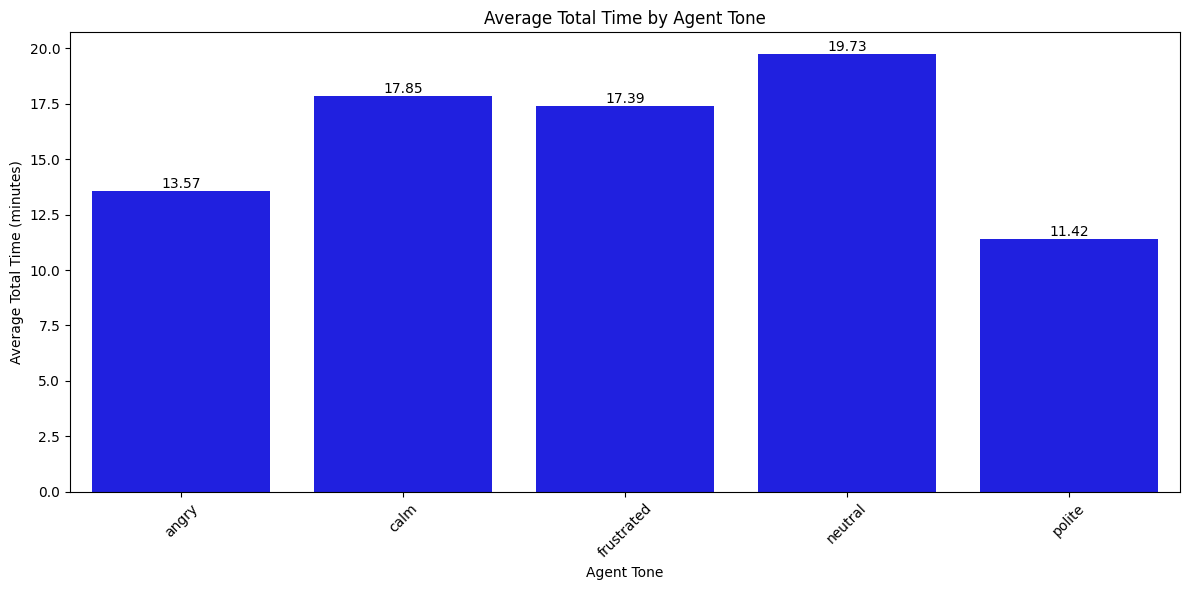

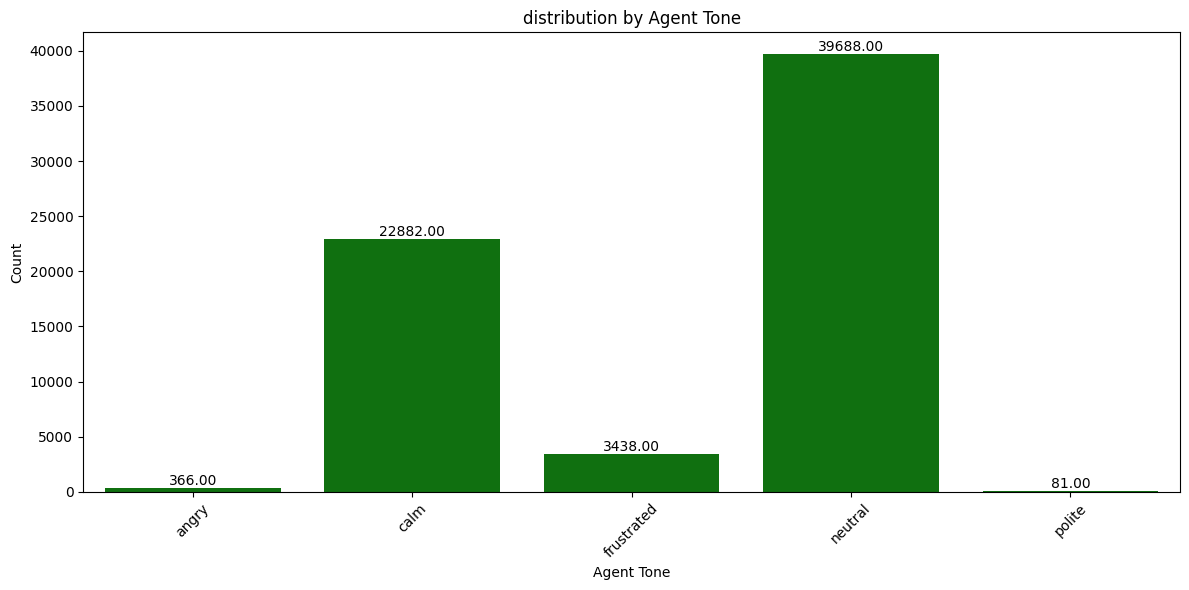

In [91]:
# Visualizing the 4 metrics w.r.t. agent tone all together

plt.figure(figsize=(12,6))
e= sns.barplot(x='agent_tone',y='AHT',data=td_by_agent_tone,color='Yellow')
plt.title('Average Handle Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(e.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
f= sns.barplot(x='agent_tone',y='ASTA',data=td_by_agent_tone,color='Red')
plt.title('Average speed to answer Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Speed To Answer Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(f.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
g= sns.barplot(x='agent_tone',y='ATA',data=td_by_agent_tone,color='Blue')
plt.title('Average Total Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Total Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(g.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
h= sns.barplot(x='agent_tone',y='count',data=td_by_agent_tone,color='Green')
plt.title('distribution by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(h.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

In [92]:
# Time division and couhnt for elite level code (loyalty status)

td_by_elite_level_code=merged_df.groupby('elite_level_code')[['Handling_time','Speed_to_answer_time','total_time','call_id']]\
.agg({'Handling_time':'mean','Speed_to_answer_time':'mean','total_time':'mean','call_id':'count'}).reset_index()
td_by_elite_level_code['Handling_time']=td_by_elite_level_code['Handling_time']/60
td_by_elite_level_code['Speed_to_answer_time']=td_by_elite_level_code['Speed_to_answer_time']/60
td_by_elite_level_code['total_time']=td_by_elite_level_code['total_time']/60
td_by_elite_level_code.columns=['elite_level_code','AHT','ASTA','ATA','count']
td_by_elite_level_code.sort_values('AHT', ascending=False)





,elite_level_code,AHT,ASTA,ATA,count
5,5.0,14.993856,6.830261,21.824117,1302
4,4.0,12.899490,6.902041,19.801531,1960
3,3.0,12.169829,7.156546,19.326376,5270
2,2.0,12.095865,7.215763,19.311627,7448
1,1.0,11.460706,7.272953,18.733659,13310
0,0.0,11.351298,7.352967,18.704265,37165


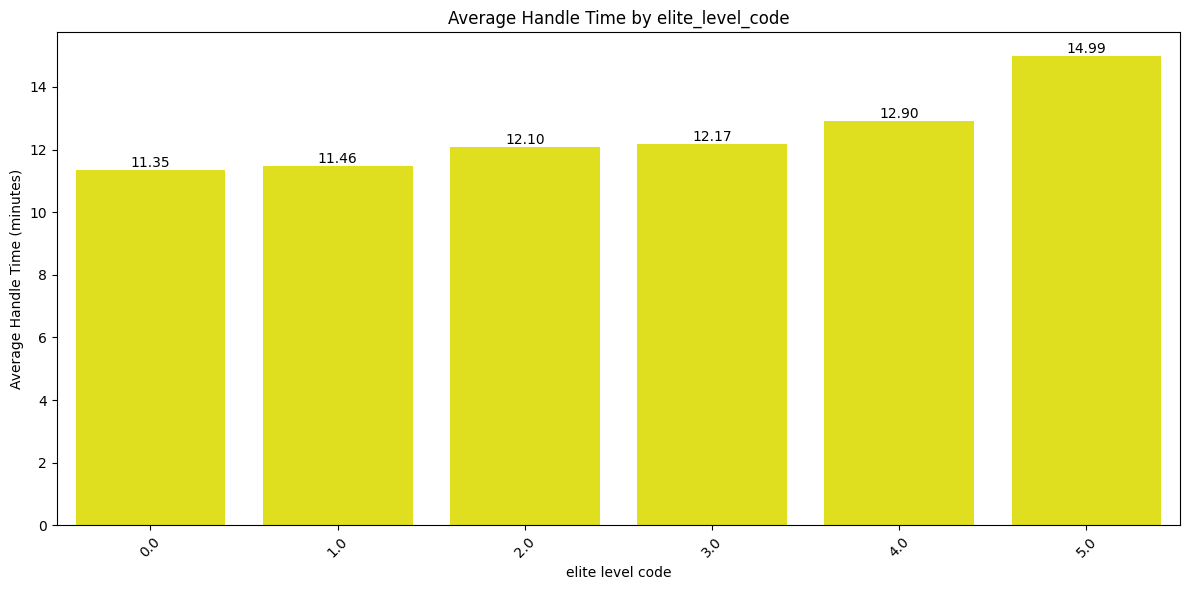

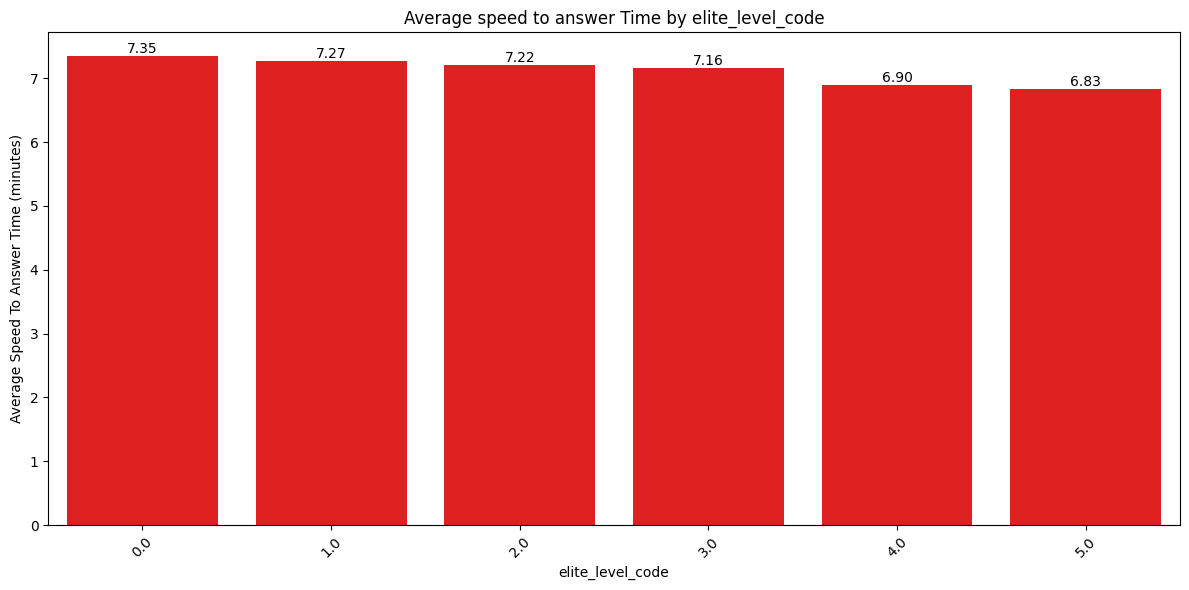

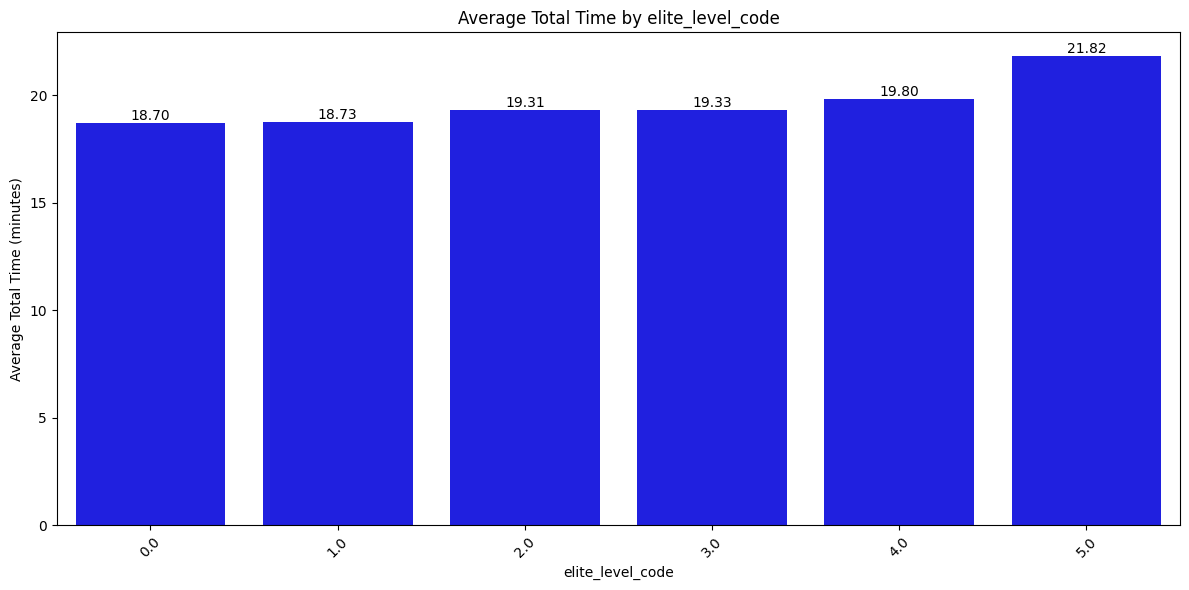

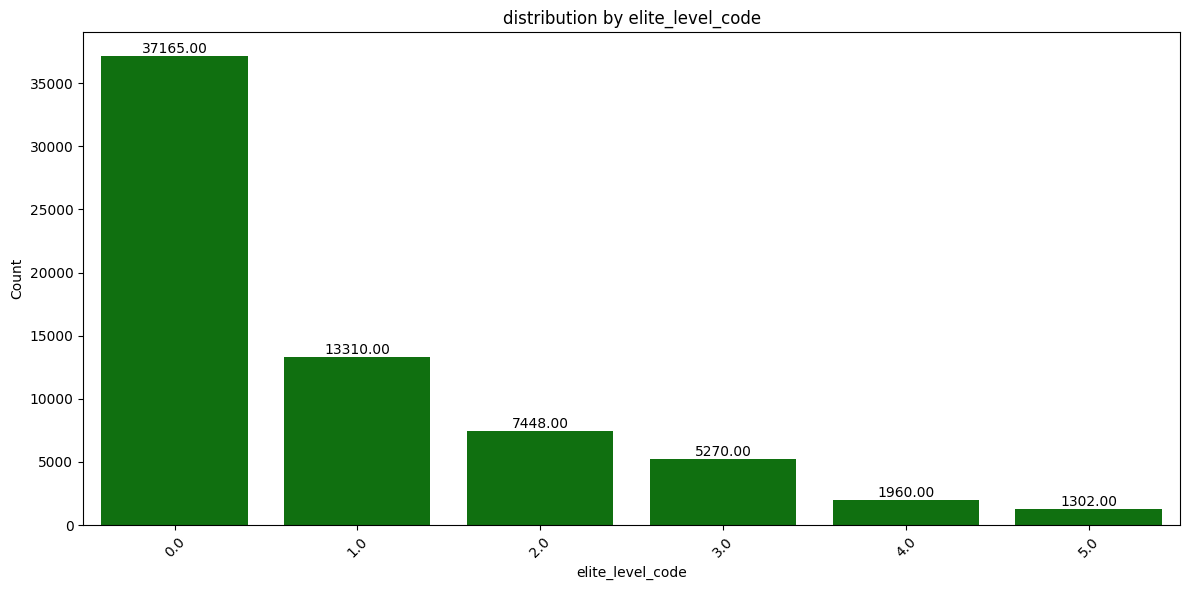

In [93]:
# Visualizing the 4 metrics w.r.t. elite_level_code (loyalty status) altogether

plt.figure(figsize=(12,6))
i= sns.barplot(x='elite_level_code',y='AHT',data=td_by_elite_level_code,color='Yellow')
plt.title('Average Handle Time by elite_level_code')
plt.xlabel('elite level code')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(i.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
j= sns.barplot(x='elite_level_code',y='ASTA',data=td_by_elite_level_code,color='Red')
plt.title('Average speed to answer Time by elite_level_code')
plt.xlabel('elite_level_code')
plt.ylabel('Average Speed To Answer Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(j.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
k= sns.barplot(x='elite_level_code',y='ATA',data=td_by_elite_level_code,color='Blue')
plt.title('Average Total Time by elite_level_code')
plt.xlabel('elite_level_code')
plt.ylabel('Average Total Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(k.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
l= sns.barplot(x='elite_level_code',y='count',data=td_by_elite_level_code,color='Green')
plt.title('distribution by elite_level_code')
plt.xlabel('elite_level_code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(l.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

In [94]:
# Time division and count for Customer Tone

td_by_customer_tone=merged_df.groupby('customer_tone')[['Handling_time','Speed_to_answer_time','total_time','call_id']]\
.agg({'Handling_time':'mean','Speed_to_answer_time':'mean','total_time':'mean','call_id':'count'}).reset_index()
td_by_customer_tone['Handling_time']=td_by_customer_tone['Handling_time']/60
td_by_customer_tone['Speed_to_answer_time']=td_by_customer_tone['Speed_to_answer_time']/60
td_by_customer_tone['total_time']=td_by_customer_tone['total_time']/60
td_by_customer_tone.columns=['customer_tone','AHT','ASTA','ATA','count']
td_by_customer_tone.sort_values('AHT', ascending=False)

,customer_tone,AHT,ASTA,ATA,count
3,neutral,11.785276,7.294179,19.079455,13366
1,calm,11.712149,7.287549,18.999698,13236
0,angry,11.587546,7.281529,18.869075,13313
4,polite,11.553741,7.274586,18.828327,13351
2,frustrated,11.553567,7.274320,18.827887,13189


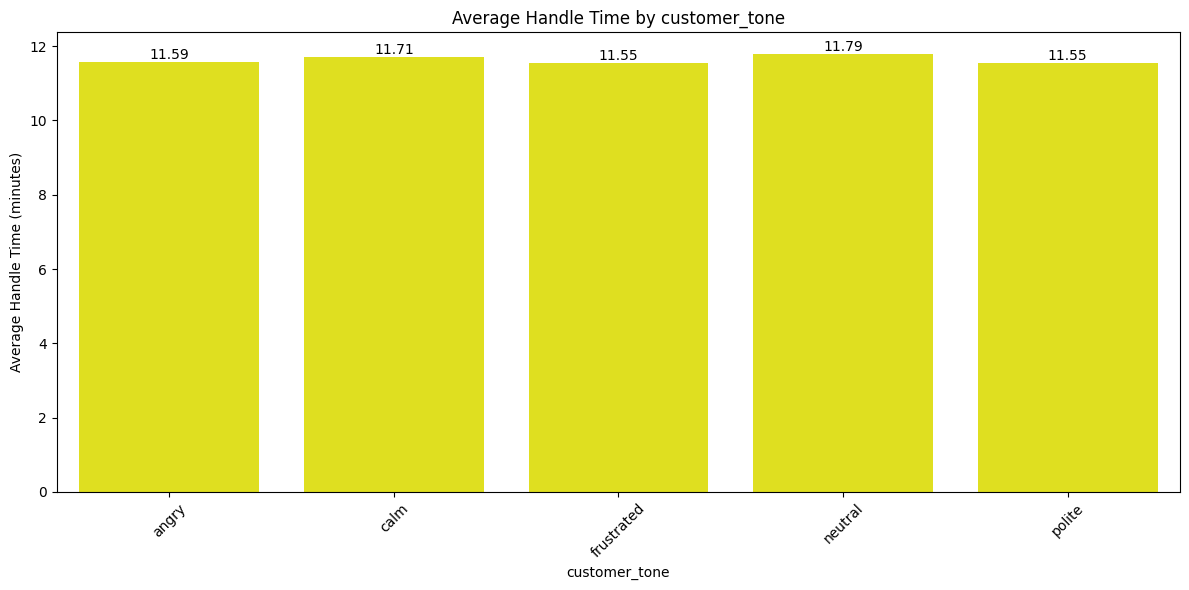

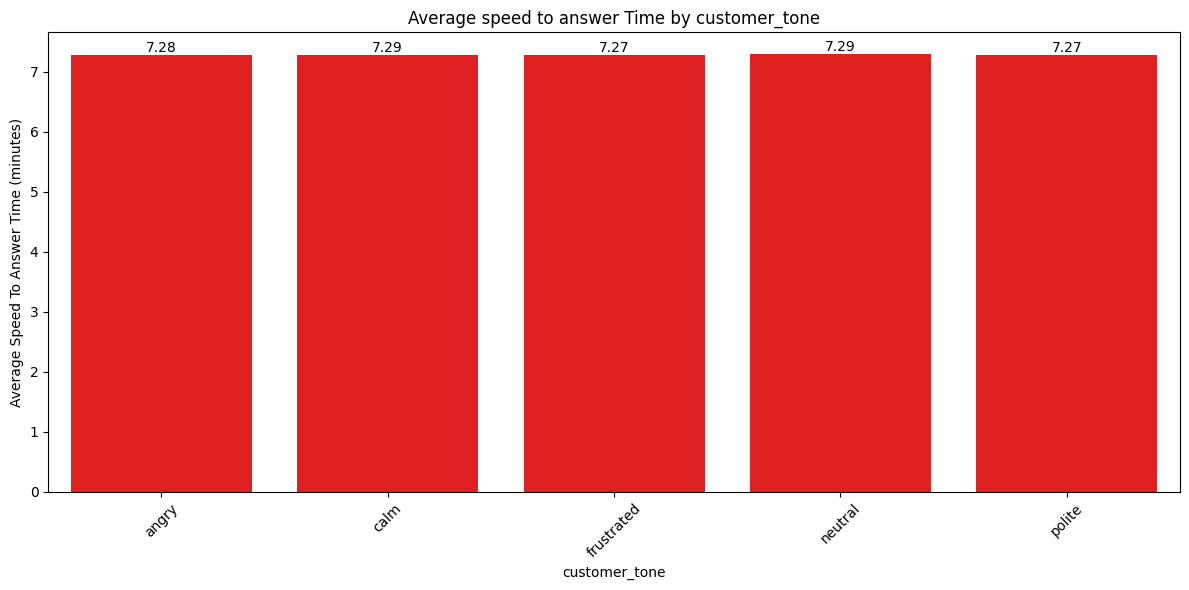

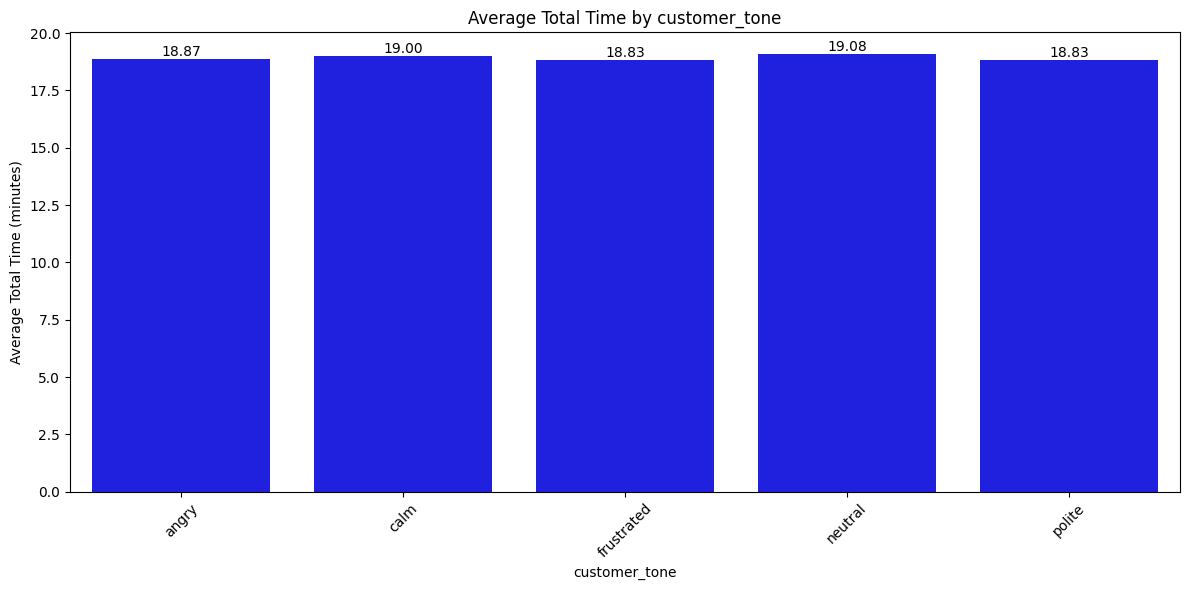

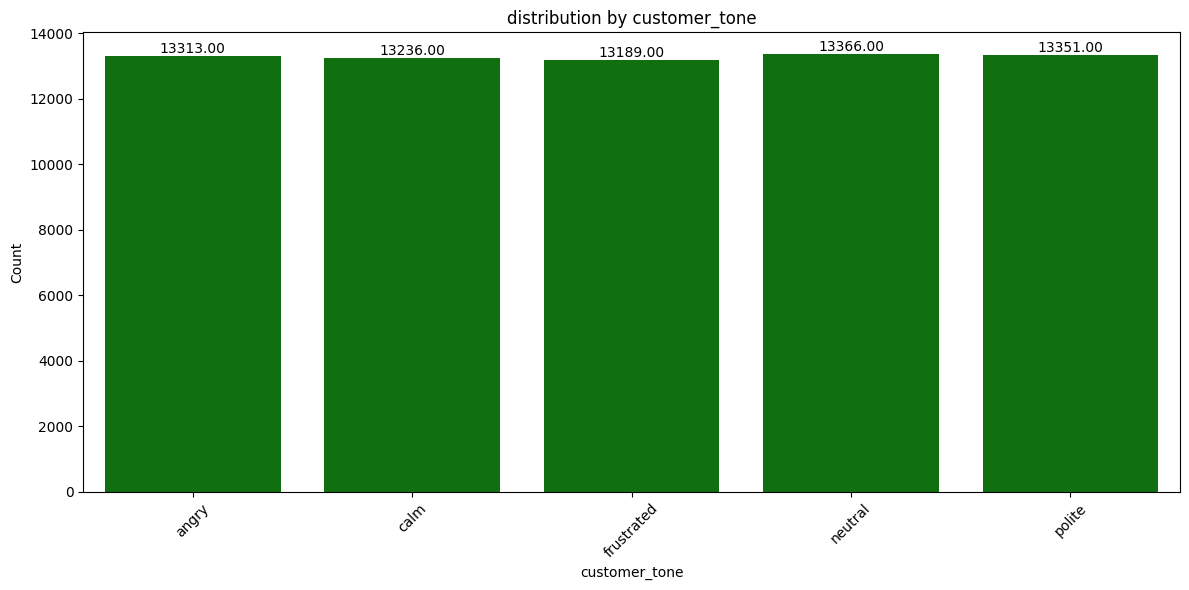

In [95]:
#Visualizing the 4 metrics w.r.t. customer_tone altogether

plt.figure(figsize=(12,6))
m= sns.barplot(x='customer_tone',y='AHT',data=td_by_customer_tone,color='Yellow')
plt.title('Average Handle Time by customer_tone')
plt.xlabel('customer_tone')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(m.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
n= sns.barplot(x='customer_tone',y='ASTA',data=td_by_customer_tone,color='Red')
plt.title('Average speed to answer Time by customer_tone')
plt.xlabel('customer_tone')
plt.ylabel('Average Speed To Answer Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(n.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
o= sns.barplot(x='customer_tone',y='ATA',data=td_by_customer_tone,color='Blue')
plt.title('Average Total Time by customer_tone')
plt.xlabel('customer_tone')
plt.ylabel('Average Total Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(o.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(12,6))
p= sns.barplot(x='customer_tone',y='count',data=td_by_customer_tone,color='Green')
plt.title('distribution by customer_tone')
plt.xlabel('customer_tone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
for index, bar in enumerate(p.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

In [96]:
# Time division and count for Agent id

td_by_agent_id=merged_df.groupby('agent_id_x')[['Handling_time','Speed_to_answer_time','total_time','call_id']]\
.agg({'Handling_time':'mean','Speed_to_answer_time':'mean','total_time':'mean','call_id':'count'}).reset_index()
td_by_agent_id['Handling_time']=td_by_agent_id['Handling_time']/60
td_by_agent_id['Speed_to_answer_time']=td_by_agent_id['Speed_to_answer_time']/60
td_by_agent_id['total_time']=td_by_agent_id['total_time']/60
td_by_agent_id.columns=['agent_id','AHT','ASTA','ATA','count']
td_by_agent_id.sort_values('count', ascending=False)

,agent_id,AHT,ASTA,ATA,count
58,251287,10.573951,7.282561,17.856512,453
368,963118,10.911364,7.325000,18.236364,440
199,594957,10.765376,7.236902,18.002278,439
272,757349,11.139480,7.170213,18.309693,423
241,686999,11.249406,7.237530,18.486936,421
...,...,...,...,...,...
185,548155,10.000000,6.500000,16.500000,2
0,102574,60.000000,8.000000,68.000000,2
184,547592,3.000000,10.000000,13.000000,1
23,161354,8.000000,8.000000,16.000000,1


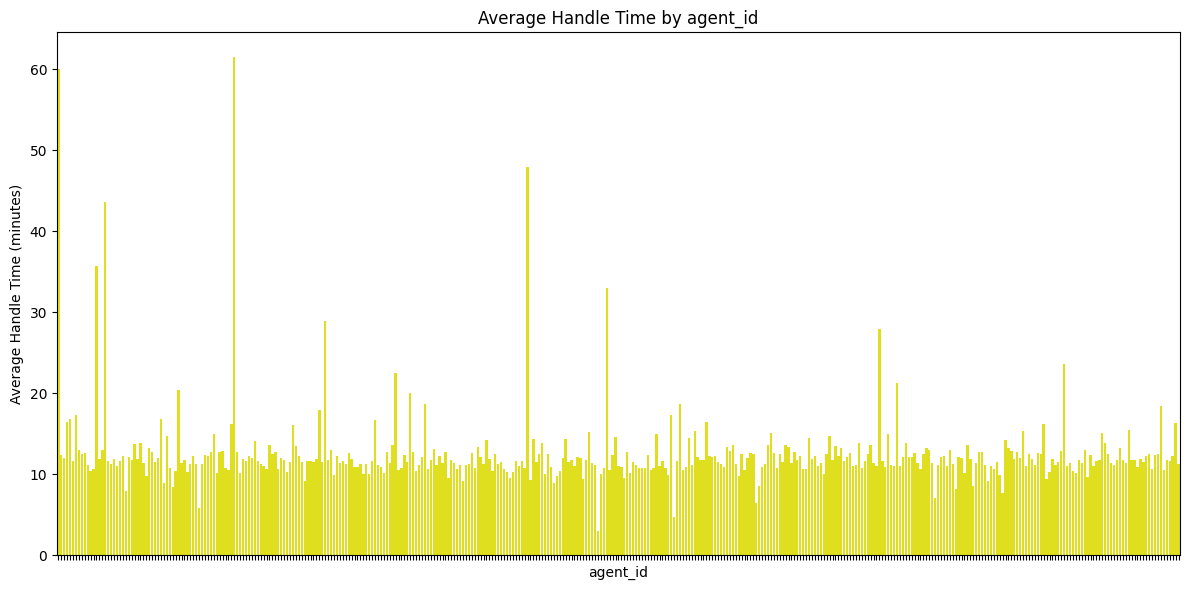

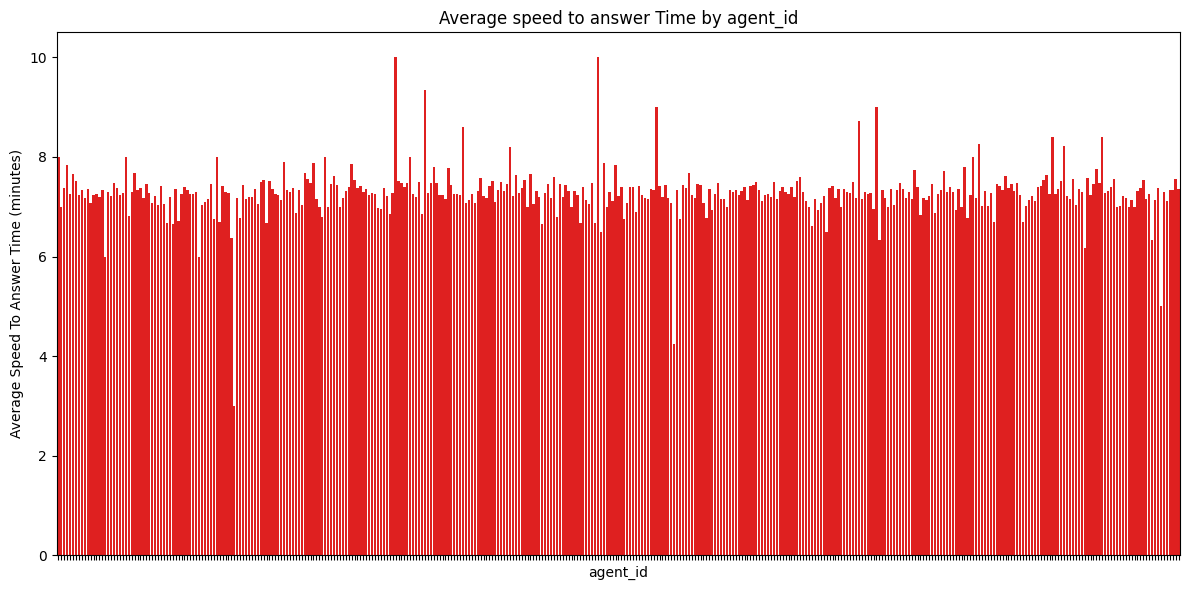

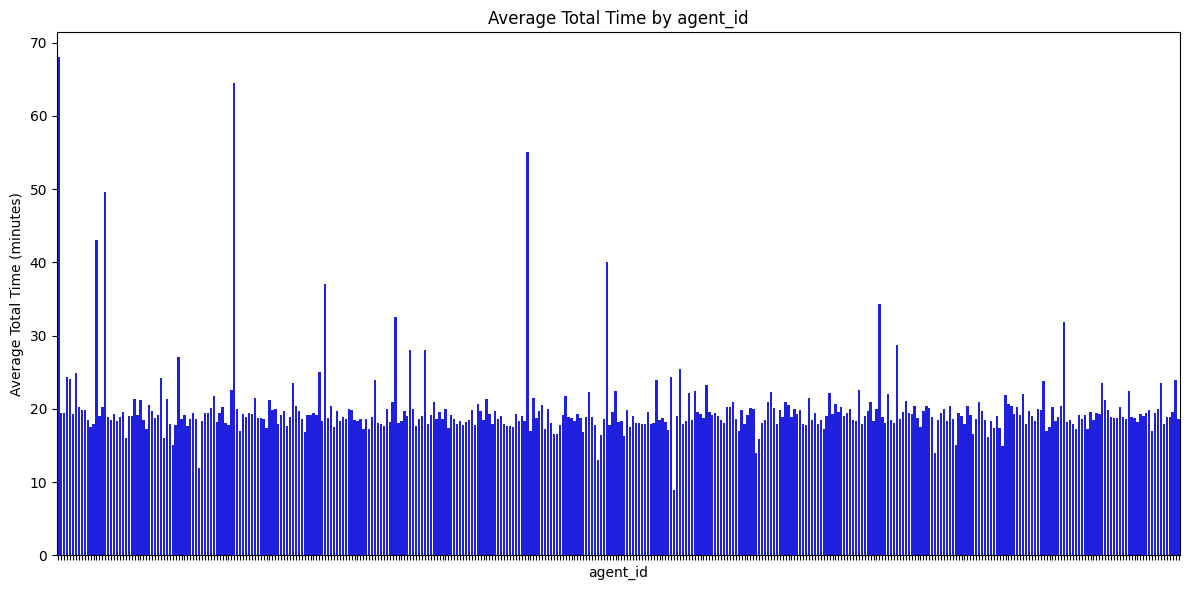

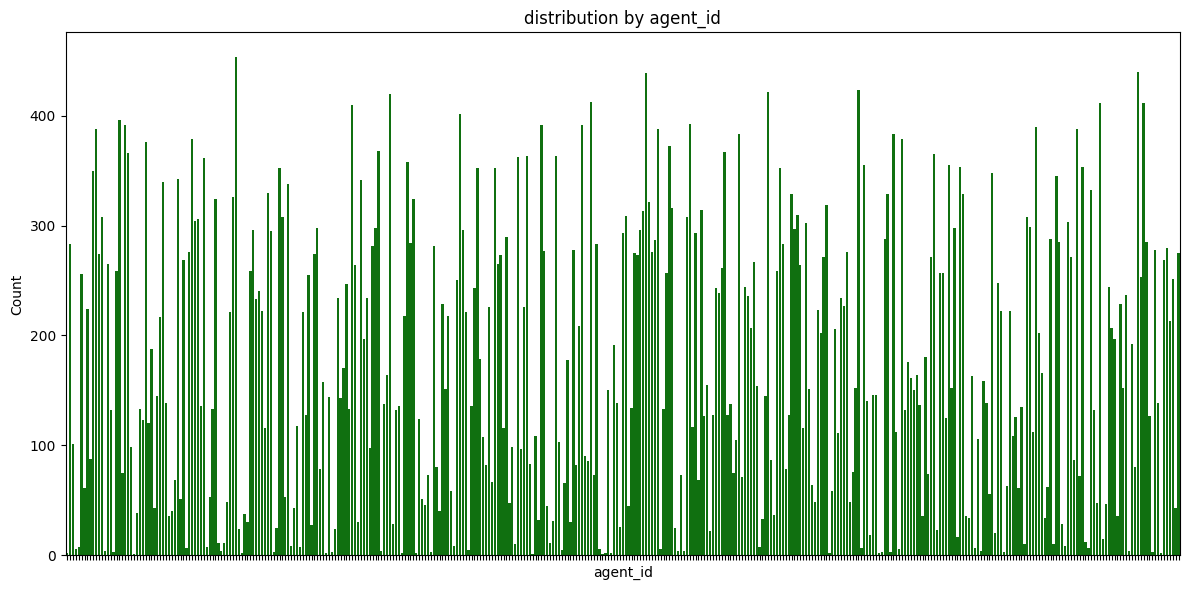

In [97]:
# Visualizing the 4 metrics w.r.t. agent_id altogether

plt.figure(figsize=(12,6))
q= sns.barplot(x='agent_id',y='AHT',data=td_by_agent_id,color='Yellow')
plt.title('Average Handle Time by agent_id')
plt.xlabel('agent_id')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(visible=False)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

plt.show()

plt.figure(figsize=(12,6))
r= sns.barplot(x='agent_id',y='ASTA',data=td_by_agent_id,color='Red')
plt.title('Average speed to answer Time by agent_id')
plt.xlabel('agent_id')
plt.ylabel('Average Speed To Answer Time (minutes)')
plt.xticks(visible=False)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

plt.show()

plt.figure(figsize=(12,6))
s= sns.barplot(x='agent_id',y='ATA',data=td_by_agent_id,color='Blue')
plt.title('Average Total Time by agent_id')
plt.xlabel('agent_id')
plt.ylabel('Average Total Time (minutes)')
plt.xticks(visible=False)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

plt.show()

plt.figure(figsize=(12,6))
t= sns.barplot(x='agent_id',y='count',data=td_by_agent_id,color='Green')
plt.title('distribution by agent_id')
plt.xlabel('agent_id')
plt.ylabel('Count')
plt.xticks(visible=False)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

plt.show()

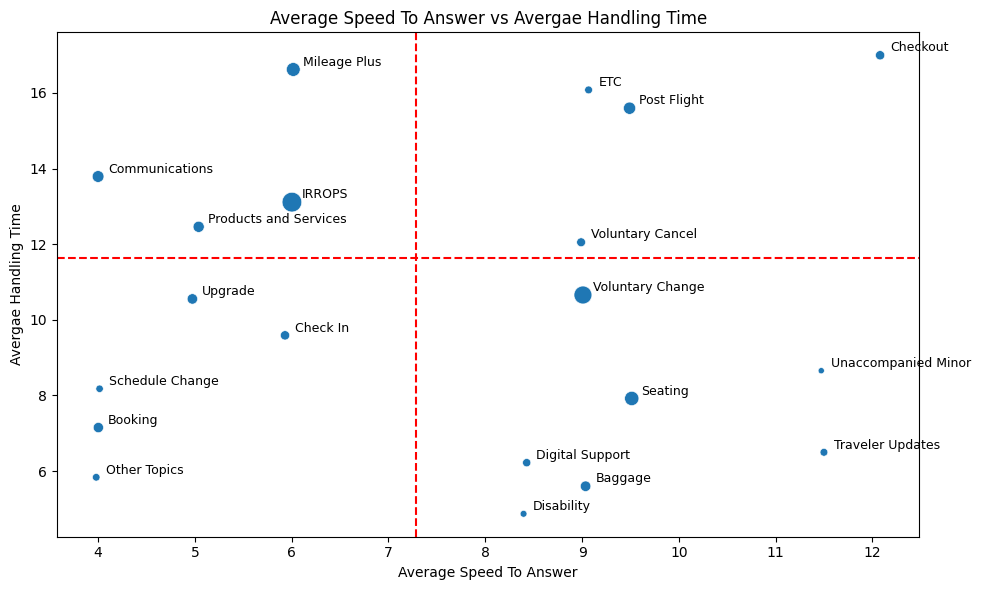

In [98]:
# Visualizing the relationship between Average Handling Time and Average Speed to answer for different primary reasons

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ASTA', y='AHT', data=td_by_reason, size='count', sizes=(20, 200),legend=False)

# Add text labels next to the points
for i in range(len(td_by_reason)):
    plt.text(x=td_by_reason['ASTA'].iloc[i] + 0.1,
             y=td_by_reason['AHT'].iloc[i] + 0.1,
             s=td_by_reason['td_by_reason'].iloc[i],
             fontsize=9)

# Add dashed lines
plt.axhline(y=mean_ht, color='r', linestyle='--', linewidth=1.5)
plt.axvline(x=mean_sta, color='r', linestyle='--', linewidth=1.5)


# Set plot labels and title
plt.xlabel('Average Speed To Answer')
plt.ylabel('Avergae Handling Time')
plt.title('Average Speed To Answer vs Avergae Handling Time')

# Show the plot
plt.tight_layout()
plt.show()


In [99]:
# Segmenting the number of calls base on the Day Of Week and Hour Of Day

call_d_by_hour_day=merged_df.groupby(['day','hour'])['call_id']\
.count().reset_index()
call_d_by_hour_day
# Pivot the DataFrame to get day and hour as indices, and call count as values
pivot_table = call_d_by_hour_day.pivot_table\
 (index='hour', columns='day', values='call_id')
pivot_table
# ‘Primary reasons’ with low handling time in the lower left and lower right portion in graph suggest that issue was either partially solved using IVR or requires minimal human intervention
# lower left region represents quick win ‘Primary reasons’ as both AHT and AST are low and minor changes to IVR can result in the customer completely solving there issues using IVR. Increasing both customer satisfaction and operational efficiency
# lower right represents medium-term win ‘Primary reasons’ issues as AST is comparatively higher but low AHT suggests a potential to solve issues using only IVR. Simplification of IVR process and highlighting these issues earlier on in IVR menus can help reduce this higher AST

day,0,1,2,3,4,5,6
hour,,,,,,,
0,70.0,74.0,88.0,105.0,97.0,358.0,271.0
1,70.0,86.0,71.0,83.0,99.0,356.0,276.0
2,53.0,84.0,64.0,76.0,93.0,327.0,266.0
3,72.0,84.0,76.0,92.0,84.0,329.0,258.0
4,73.0,75.0,74.0,85.0,86.0,327.0,260.0
5,77.0,68.0,74.0,84.0,101.0,357.0,263.0
6,66.0,86.0,70.0,71.0,93.0,348.0,272.0
7,113.0,99.0,104.0,139.0,144.0,495.0,377.0
8,346.0,358.0,343.0,447.0,432.0,1584.0,1296.0


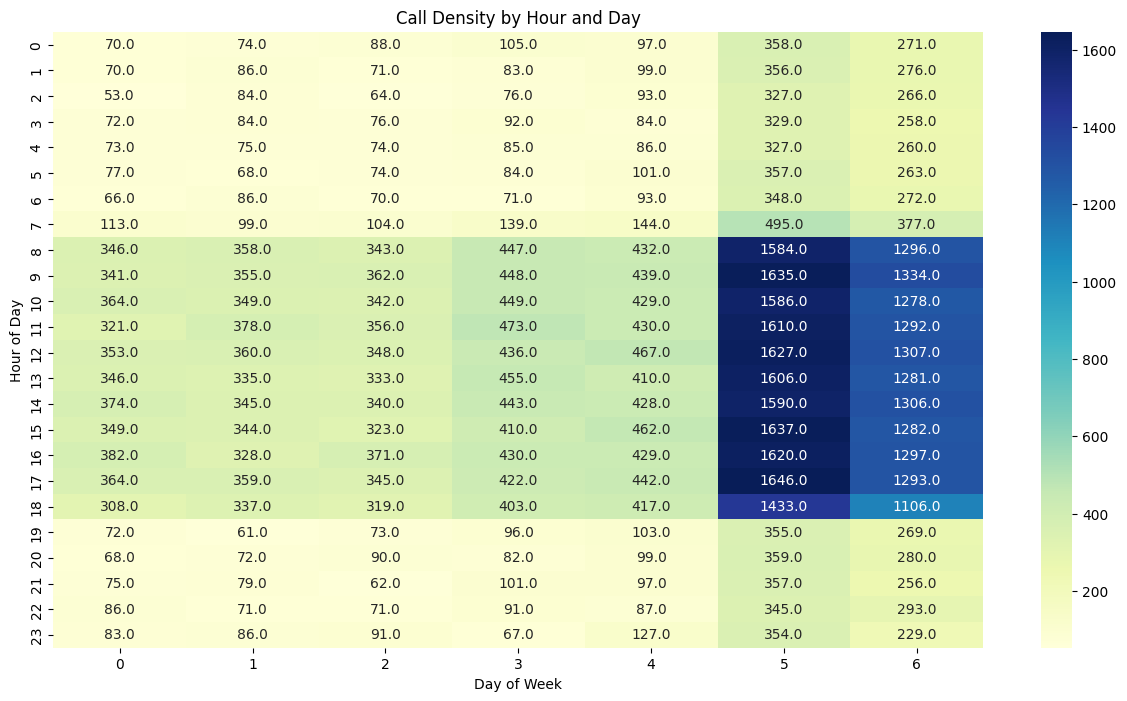

In [100]:
# Assuming 'pivot_table' is already defined with 'Day of Week' as columns and 'Hour of Day' as index
plt.figure(figsize=(15, 8))

# Plotting the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')  # Using '.1f' for float format if needed

# Add labels and title

plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Call Density by Hour and Day')


# Show the plot
plt.show()


In [101]:
# Calculate the percentage of each category for 'primary_call_reason' and 'mode'

d_by_primary_reason_mode = merged_df.groupby(['primary_call_reason', 'mode'])\
 ['call_id'].agg('count').reset_index()
d_by_primary_reason_mode['total'] = d_by_primary_reason_mode.groupby\
 ('primary_call_reason')['call_id'].transform('sum')
d_by_primary_reason_mode['percentage'] = (d_by_primary_reason_mode['call_id']\
/ d_by_primary_reason_mode['total']) * 100
d_by_primary_reason_mode



,primary_call_reason,mode,call_id,total,percentage
0,Baggage,Agent,2577,2808,91.773504
1,Baggage,IVR,231,2808,8.226496
2,Booking,Agent,2530,2624,96.417683
3,Booking,IVR,94,2624,3.582317
4,Check In,Agent,1864,1899,98.156925
5,Check In,IVR,35,1899,1.843075
6,Checkout,Agent,1855,1882,98.565356
7,Checkout,IVR,27,1882,1.434644
8,Communications,Agent,3810,3836,99.322211
9,Communications,IVR,26,3836,0.677789


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


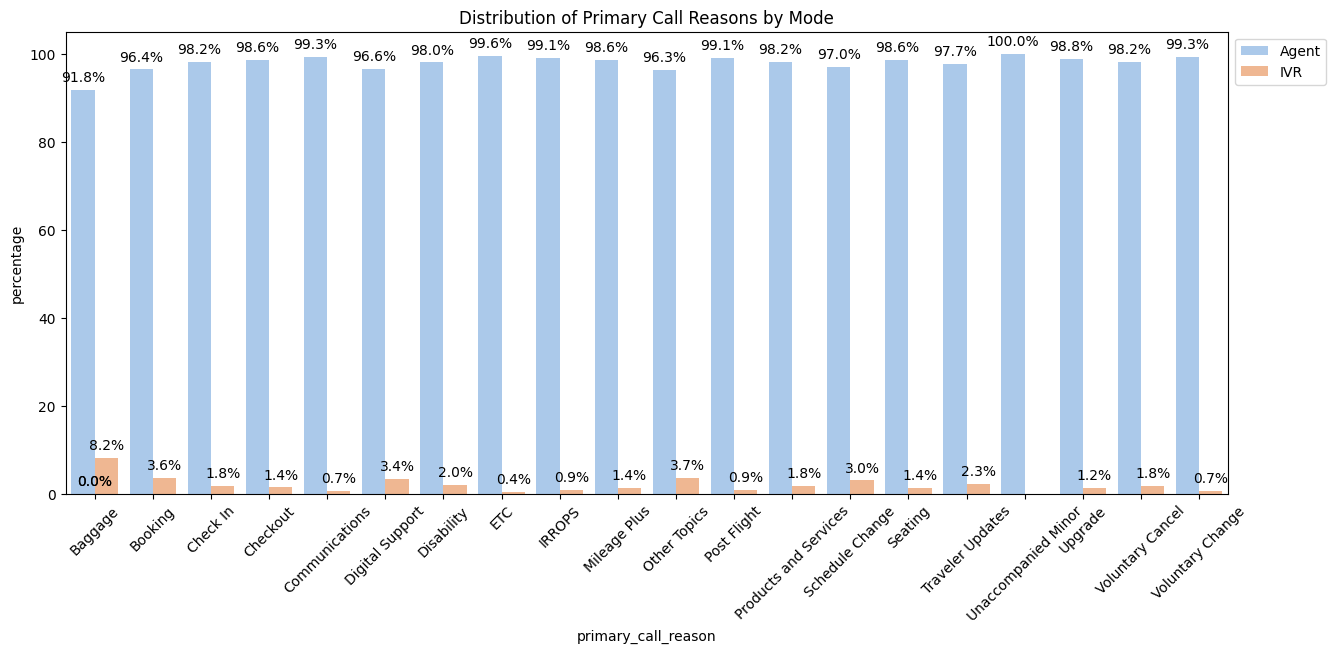

In [102]:
#Visualizing the percentage of cases in each primary reason solved by different modes (IVR,AGENT

plt.figure(figsize=(15, 6))
sns.barplot(x='primary_call_reason', y='percentage', hue='mode', data=d_by_primary_reason_mode, palette='pastel')

# Adding title and axis labels
plt.title('Distribution of Primary Call Reasons by Mode')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))

# Adding percentage labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

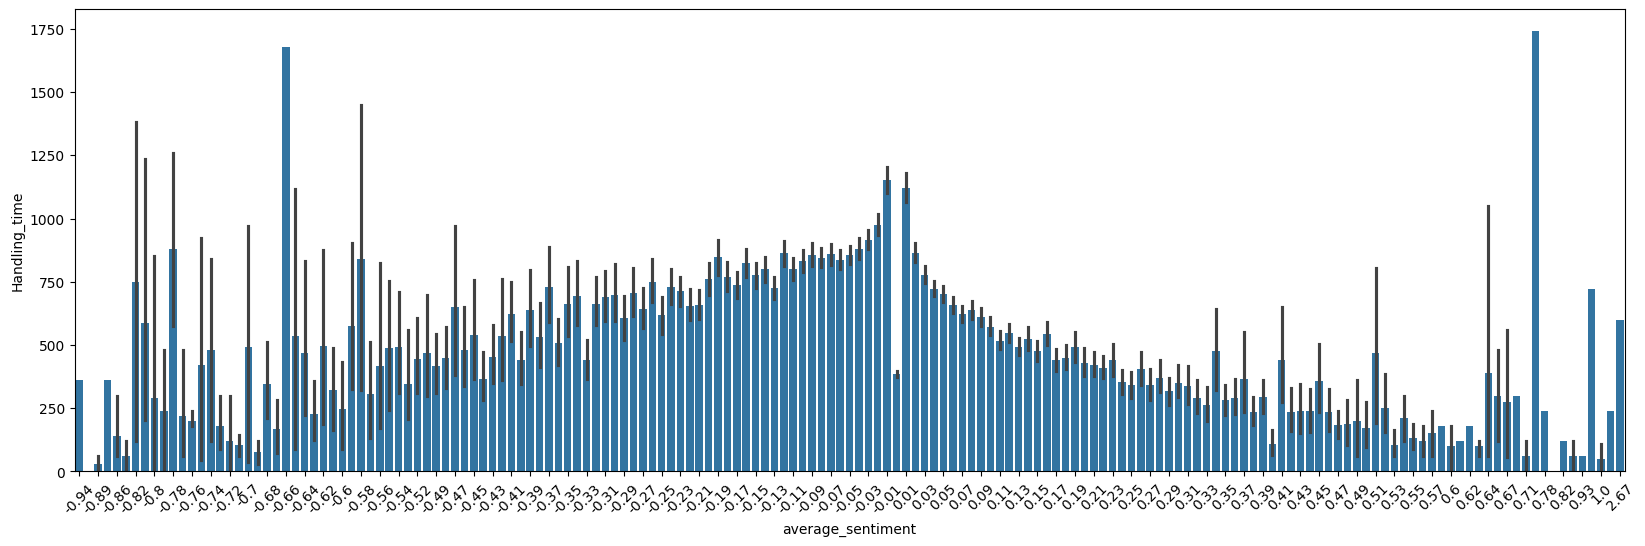

In [104]:
#distribution of average time w.r.t. different sentiment values

plt.figure(figsize=(20,6))
sns.barplot(x='average_sentiment', y='Handling_time', data=merged_df)

# Display every nth x-tick (e.g., every 2nd label)
ticks = plt.gca().get_xticks()  # Get current tick positions
plt.xticks(ticks[::2], rotation=45)  # Adjust to display every 2nd label

plt.show()

# Average handle time follows a normal distribution/ bell curve like pattern with outliers at the extremities
#AHT is maximum at zero sentiment, highly positive and highly negative
#As expected AHT decreases with increase in positive sentiment from 0->1 ( some outliers after 0.7)
#Unexpected decrease in AHT with increase in negative sentiment 0->-1 observed in the data